In [2]:
## Ramachandran lab

In [177]:
import numpy as np
import requests as rq
import pandas as pd
import Bio.PDB as bp
from io import StringIO
import matplotlib.pyplot as plt

In [217]:
## get data file
def get_reference_dataset():
    remote_url = 'https://raw.githubusercontent.com/rlabduke/reference_data/master/Top8000/Top8000_ramachandran_pct_contour_grids/rama8000-general-noGPIVpreP.data'
    r = requests.get(remote_url)
    df = pd.read_csv(StringIO(r.text),sep=' ',skiprows=6,names=['psi','phi','density'])
    return(df)

In [218]:
## getting the PBD file and calculating the psi and phi.
def get_rcsb(pdb_id): ## double check this 
    get_request = "https://files.rcsb.org/download/"
    
    try:
        request = rq.get(get_request+pdb_id+".pdb")
        
    except rq.exceptions.HTTPError:
        raise Exception("PDB ID could not be found in RCSB database.")

    return(request)

def load_pdb(pdb_id):
    pdb_data_file = get_rcsb(pdb_id)
    
    parser = bp.PDBParser()
    pdb_structure = parser.get_structure(pdb_id,StringIO(pdb_data_file.text))
    
    return(pdb_structure)
    
def get_psi_phi_from_structure(structure):
    psi_phi_list = []
    for model in structure:
        for chain in model:
            temp_peptide = bp.PPBuilder().build_peptides(chain)
            psi_phi_list += temp_peptide[0].get_phi_psi_list()

    data = pd.DataFrame(psi_phi_list).dropna()*180/np.pi
    data = data.rename(columns={0:'psi',1:'phi'})
    
    return(data)
    
def get_psi_phi_from_pdb(pdb_id):
    structure = load_pdb(pdb_id.upper())
    data = get_psi_phi_from_structure(structure)
    return(data)
    

In [245]:
dat = get_psi_phi_from_pdb('6AC8')

//anaconda3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18332.
  PDBConstructionWarning)
//anaconda3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18367.
  PDBConstructionWarning)
//anaconda3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18387.
  PDBConstructionWarning)
//anaconda3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18438.
  PDBConstructionWarning)


In [246]:
ref = get_reference_dataset()

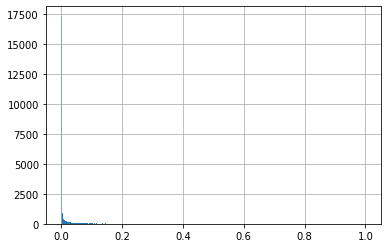

In [247]:
ref.density.hist(bins=500)